<a href="https://colab.research.google.com/github/ishgirwan/gee/blob/master/karnataka_hdi_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EDA of Karnataka HDI data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#pip install tabula-py
#import tabula

# Read pdf into list of DataFrame
#df = tabula.read_pdf("/content/drive/My Drive/omdena/VillageHDIintheState.pdf", pages='all')
#tabula.convert_into("/content/drive/My Drive/omdena/VillageHDIintheState.pdf", "/content/drive/My Drive/omdena/karnataka_hdi.csv", output_format="csv", pages='all')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = pd.read_csv("/content/drive/My Drive/omdena/karnataka_hdi.csv")

In [4]:
df.head()

,District,Taluk,Gram Panchayat,Village,Standard of\rliving index,Rank,Health\rIndex,Rank.1,Education\rIndex,Rank.2,HDI,Rank.3
0,Bengaluru Urban,Bengaluru North,Arakere,Arakere,0.69966,1.0,1.00000,1.0,0.60993,4796.0,0.75287,1.0
1,Bengaluru Urban,Bengaluru North,Vaderahalli,Shamarajpura,0.69553,2.0,0.97289,22344.0,0.61509,3765.0,0.74663,2.0
2,Bengaluru Urban,Bengaluru North,Kasagattapura,Kasagattapura,0.49102,76.0,1.00000,1.0,0.81767,2.0,0.73772,3.0
3,Bengaluru Urban,Bengaluru North,Adakamaranahalli,Makali,0.63767,3.0,1.00000,1.0,0.59298,8643.0,0.72313,4.0
4,Bengaluru Urban,Bengaluru North,Shivakote,Kalenahalli,0.62548,5.0,1.00000,1.0,0.60343,6110.0,0.72268,5.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27077 entries, 0 to 27076
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   District                  27075 non-null  object 
 1   Taluk                     27075 non-null  object 
 2   Gram Panchayat            27075 non-null  object 
 3   Village                   27076 non-null  object 
living index  27075 non-null  object 
 5   Rank                      27075 non-null  float64
Index              27075 non-null  float64
 7   Rank.1                    27075 non-null  float64
Index           27075 non-null  float64
 9   Rank.2                    27075 non-null  float64
 10  HDI                       27075 non-null  float64
 11  Rank.3                    27075 non-null  float64
dtypes: float64(7), object(5)
memory usage: 2.5+ MB


In [6]:
df = df.rename(columns={'Education\rIndex': 'Education_Index', 'Health\rIndex': 'Health_Index', 'Standard of\rliving index': 'Standard_of_living_index' })

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27077 entries, 0 to 27076
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   District                  27075 non-null  object 
 1   Taluk                     27075 non-null  object 
 2   Gram Panchayat            27075 non-null  object 
 3   Village                   27076 non-null  object 
 4   Standard_of_living_index  27075 non-null  object 
 5   Rank                      27075 non-null  float64
 6   Health_Index              27075 non-null  float64
 7   Rank.1                    27075 non-null  float64
 8   Education_Index           27075 non-null  float64
 9   Rank.2                    27075 non-null  float64
 10  HDI                       27075 non-null  float64
 11  Rank.3                    27075 non-null  float64
dtypes: float64(7), object(5)
memory usage: 2.5+ MB


In [8]:
df['Standard_of_living_index'] = df['Standard_of_living_index'].str.replace(' ', '')

In [9]:
df.astype({'Standard_of_living_index': 'float64'}).dtypes

District                     object
Taluk                        object
Gram Panchayat               object
Village                      object
Standard_of_living_index    float64
Rank                        float64
Health_Index                float64
Rank.1                      float64
Education_Index             float64
Rank.2                      float64
HDI                         float64
Rank.3                      float64
dtype: object

In [10]:
df.describe()

,Rank,Health_Index,Rank.1,Education_Index,Rank.2,HDI,Rank.3
count,27075.000000,27075.000000,27075.000000,27075.000000,27075.000000,27075.000000,27075.000000
mean,13537.998892,0.990887,4476.054700,0.565508,13520.742678,0.406786,13537.999040
std,7816.023177,0.029470,9279.955049,0.049246,7844.352578,0.106000,7816.023077
min,1.000000,0.238490,1.000000,0.001560,1.000000,0.003700,1.000000
25%,6769.500000,1.000000,1.000000,0.540910,6769.500000,0.341950,6769.500000
50%,13538.000000,1.000000,1.000000,0.573840,13538.000000,0.419730,13538.000000
75%,20306.500000,1.000000,1.000000,0.600645,20306.000000,0.480575,20306.500000
max,27075.000000,1.000000,27075.000000,0.957010,27075.000000,0.752870,27075.000000


In [11]:
df.head(10)

,District,Taluk,Gram Panchayat,Village,Standard_of_living_index,Rank,Health_Index,Rank.1,Education_Index,Rank.2,HDI,Rank.3
0,Bengaluru Urban,Bengaluru North,Arakere,Arakere,0.69966,1.0,1.00000,1.0,0.60993,4796.0,0.75287,1.0
1,Bengaluru Urban,Bengaluru North,Vaderahalli,Shamarajpura,0.69553,2.0,0.97289,22344.0,0.61509,3765.0,0.74663,2.0
2,Bengaluru Urban,Bengaluru North,Kasagattapura,Kasagattapura,0.49102,76.0,1.00000,1.0,0.81767,2.0,0.73772,3.0
3,Bengaluru Urban,Bengaluru North,Adakamaranahalli,Makali,0.63767,3.0,1.00000,1.0,0.59298,8643.0,0.72313,4.0
4,Bengaluru Urban,Bengaluru North,Shivakote,Kalenahalli,0.62548,5.0,1.00000,1.0,0.60343,6110.0,0.72268,5.0
5,Bengaluru Urban,Bengaluru North,Madanayakanahalli,Kadaranahalli,0.61736,8.0,1.00000,1.0,0.61009,4753.0,0.72218,6.0
6,Bengaluru Urban,Anekal,Vanakanahalli,Menasiganahalli,0.39336,284.0,1.00000,1.0,0.95701,1.0,0.72205,7.0
7,Bengaluru Urban,Bengaluru North,Huskur,Huskur,0.60975,9.0,1.00000,1.0,0.61438,3898.0,0.72088,8.0
8,Bengaluru Urban,Bengaluru South,Nelaguli,Naganayakanaha\rlli,0.63176,4.0,1.00000,1.0,0.58934,9562.0,0.71940,9.0
9,Bengaluru Urban,Bengaluru South,Chikkana halli,Sulivara,0.59381,14.0,1.00000,1.0,0.61554,3680.0,0.71499,10.0


In [12]:
df.Village.value_counts()

Hosahalli        98
Kodihalli        47
Siddapura        39
Kurubarahalli    36
Honnenahalli     36
                 ..
Yadadore          1
Kesarakoni        1
Madeswara         1
Mehkar            1
Yaduvanahalli     1
Name: Village, Length: 20581, dtype: int64

There are several villages with same names.

In [13]:
df.loc[df.Village == 'Hosahalli']

,District,Taluk,Gram Panchayat,Village,Standard_of_living_index,Rank,Health_Index,Rank.1,Education_Index,Rank.2,HDI,Rank.3
137,Bengaluru Urban,Bengaluru North,Hunasamaranahalli,Hosahalli,0.44365,157.0,1.0,1.0,0.60111,6665.0,0.64367,138.0
141,Bengaluru Urban,Anekal,Hennagara,Hosahalli,0.44468,153.0,1.0,1.0,0.59777,7427.0,0.64298,142.0
543,Shivamogga,Shivamogga,Hosahalli,Hosahalli,0.33057,745.0,1.0,1.0,0.61950,2841.0,0.58943,544.0
644,Hassan,Hassan,Salagame,Hosahalli,0.31838,920.0,1.0,1.0,0.62273,1908.0,0.58311,645.0
952,Mysuru,Mysuru,Yadakola,Hosahalli,0.30334,1264.0,1.0,1.0,0.61374,4019.0,0.57100,953.0
...,...,...,...,...,...,...,...,...,...,...,...,...
25746,Hassan,Sakleshpur,Valalahalli,Hosahalli,0.01569,25855.0,1.0,1.0,0.60211,6412.0,0.21138,25747.0
25757,Tumakuru,Kunigal,Kothagere,Hosahalli,0.01498,25901.0,1.0,1.0,0.62553,13.0,0.21082,25758.0
26774,Hassan,Alur,Mallapura,Hosahalli,0.00280,26773.0,1.0,1.0,0.54171,20168.0,0.11495,26775.0
26798,Bengaluru Rural,Nelamangala,Soladevanahalli,Hosahalli,0.00234,26829.0,1.0,1.0,0.61045,4667.0,0.11260,26799.0


In [14]:
df['HDI'].isnull().values.any()

True

In [15]:
df.loc[df['HDI'].isnull()]

,District,Taluk,Gram Panchayat,Village,Standard_of_living_index,Rank,Health_Index,Rank.1,Education_Index,Rank.2,HDI,Rank.3
27074,NaN,NaN,NaN,Chikkathekalavat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27076,Chitradurga,Hosadurga,Chikkabyladakere,ti,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
#df.dropna(subset=['HDI']);
df = df[df['HDI'].notna()]

In [17]:
df['HDI'].isnull().values.any()

False

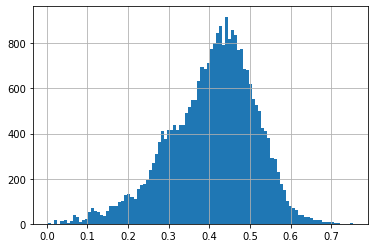

In [18]:
hdi_hist = df['HDI'].hist(bins=100)

The HDI data distribution looks like a normal distribution.

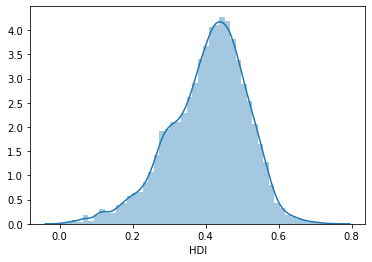

In [19]:
sns.distplot(df['HDI']);

In [20]:
# convert to csv
df.to_csv('/content/drive/My Drive/omdena/cleaned_karnataka_hdi.csv')